## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

# Data from an API source:

### Obtain Data

The following three datasets contain the median household listing price for all homes in the states of Utah, Colorado, and Idaho. This data can be used to show the cost of living difference between the three states. It can also be combined with corporate data to determine if they have higher sales in a state with a higher cost of living or if there is some other relationship.

In [1]:
import quandl
Utahhd= quandl.get('ZILLOW/S44_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')
Idahohd= quandl.get('ZILLOW/S15_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')
Coloradohd= quandl.get('ZILLOW/S7_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')

In [2]:
Utahhd.describe()

,Value
count,54.000000
mean,278497.537037
std,32834.511692
min,230000.000000
25%,249900.000000
50%,284500.000000
75%,299800.000000
max,334900.000000


In [3]:
Idahohd.describe()

,Value
count,95.000000
mean,191988.468421
std,42838.288047
min,132700.000000
25%,149900.000000
50%,190000.000000
75%,225647.000000
max,274900.000000


In [4]:
Coloradohd.describe()

,Value
count,95.000000
mean,297140.278947
std,65523.201871
min,199900.000000
25%,237225.750000
50%,289900.000000
75%,355000.000000
max,408800.000000


### Clean Data

Note that the data from each state does not contain the same amount of observations with both Idaho and Colorado beginning before Utah's data. To correct for this, I will merge the dataframes and only keep the datapoints that all three states contain.

In [5]:
import pandas as pd
ui= Utahhd.merge(Idahohd, right_index=True, left_index=True)
uic= ui.merge(Coloradohd, right_index=True, left_index=True)
uic.columns = ['Utah','Idaho','Colorado']
uic.head(6)

,Utah,Idaho,Colorado
Date,,,
2013-06-30,230000.0,190000.0,279000.0
2013-07-31,234900.0,194900.0,282000.0
2013-08-31,234900.0,194500.0,284992.5
2013-09-30,235000.0,194990.0,289900.0
2013-10-31,234900.0,190000.0,285000.0
2013-11-30,234900.0,184990.0,285000.0


In [6]:
#Check that counts are correct across each state
uic.describe(percentiles=[.05,.15,.85,.95])

,Utah,Idaho,Colorado
count,54.000000,54.000000,54.000000
mean,278497.537037,222204.888889,346531.805556
std,32834.511692,30829.644300,39766.696708
min,230000.000000,166763.500000,279000.000000
5%,234900.000000,182243.500000,284997.375000
15%,235000.000000,190000.000000,294745.000000
50%,284500.000000,223950.000000,350000.000000
85%,315250.000000,254684.650000,390450.000000
95%,329175.000000,271160.000000,404885.500000
max,334900.000000,274900.000000,408800.000000


In [7]:
uic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2013-06-30 to 2017-11-30
Data columns (total 3 columns):
Utah        54 non-null float64
Idaho       54 non-null float64
Colorado    54 non-null float64
dtypes: float64(3)
memory usage: 1.7 KB


In [8]:
#Check for missing values
uic.columns[uic.isnull().any()]

Index([], dtype='object')

There are no missing values from June 2013 to November 2017

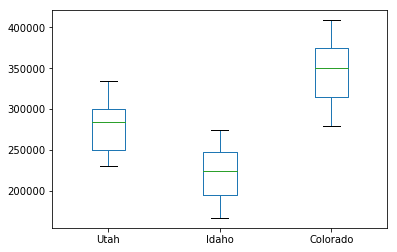

In [9]:
#Look for outliers
import matplotlib.pyplot as plt
%matplotlib inline
uicbox= uic.plot(kind='box')

In [10]:
#Utah Outliers
std_Utah= uic['Utah'].std()
print('Anything beyond {} is an outlier'.format((std_Utah*3)+ uic['Utah'].mean()))
print('The maximum value is {}'.format(uic['Utah'].max()))
print('Anything less than {} is an oulier'.format(uic['Utah'].mean() - (std_Utah*3)))
print('The minimum value is {}'.format(uic['Utah'].min()))

Anything beyond 377001.0721136106 is an outlier
The maximum value is 334900.0
Anything less than 179994.00196046344 is an oulier
The minimum value is 230000.0


In [11]:
#Idaho Outliers
std_Idaho= uic['Idaho'].std()
print('Anything beyond {} is an outlier'.format((std_Idaho*3)+ uic['Idaho'].mean()))
print('The maximum value is {}'.format(uic['Idaho'].max()))
print('Anything less than {} is an oulier'.format(uic['Idaho'].mean() - (std_Idaho*3)))
print('The minimum value is {}'.format(uic['Idaho'].min()))

Anything beyond 314693.8217894522 is an outlier
The maximum value is 274900.0
Anything less than 129715.95598832554 is an oulier
The minimum value is 166763.5


In [12]:
#Colorado Outliers
std_Colorado= uic['Colorado'].std()
maxoutColorado= (std_Colorado*3)+ uic['Colorado'].mean()
minoutColorado= uic['Colorado'].mean() - (std_Colorado*3)
print('Anything beyond {} is an outlier'.format(maxoutColorado))
print('The maximum value is {}'.format(uic['Colorado'].max()))
print('Anything less than {} is an oulier'.format(minoutColorado))
print('The minimum value is {}'.format(uic['Colorado'].min()))

Anything beyond 465831.8956800589 is an outlier
The maximum value is 408800.0
Anything less than 227231.7154310522 is an oulier
The minimum value is 279000.0


There are no outliers in any of the three states

### Visualize

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


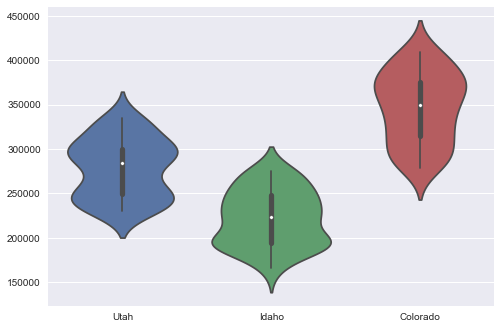

In [13]:
import seaborn as sns
sns.violinplot(uic)
sns.despine(left=True, bottom=True)

From this the tables and this visualization, it is clear that Colorado housing prices are on average greater than those of Idaho or Utah. This would imply a higher cost of living.

# Data from CSV:

### Obtain Data

The following data comes from a dataset that I collected on all of the school districts in Colorado with information on their students and teachers.

In [14]:
School_data= pd.read_csv("/Users/tristanmoser/Files/Tristan/CondensedMilk2.csv")

### Look at and Clean Data

In [15]:
School_data.describe(percentiles=[.1,.9])

,Year,MHI,MHItS,GR,MTS,MTStS,SToTR,FemT,TotT,FtoTR,WhiT,PctWT,PctMS,NumS
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,2014.000000,51103.346442,0.858858,0.822678,40038.071985,0.816966,41.106742,218.814607,288.629213,0.744944,256.011236,0.917210,0.326742,4846.614232
std,0.817262,14271.270922,0.239973,0.162112,6840.826751,0.139297,165.291235,557.783904,736.222808,0.073305,638.164309,0.113089,0.221190,12709.425752
min,2013.000000,22304.000000,0.380000,0.000000,18103.610000,0.370000,2.990000,3.000000,3.000000,0.440000,3.000000,0.140000,0.000000,10.000000
10%,2013.000000,34923.300000,0.583000,0.640000,32938.579000,0.673000,8.181000,12.000000,16.000000,0.650000,15.000000,0.813000,0.110000,121.300000
50%,2014.000000,48750.000000,0.820000,0.850000,38826.440000,0.790000,14.435000,32.000000,43.000000,0.750000,41.000000,0.950000,0.260000,585.500000
90%,2015.000000,69763.100000,1.180000,1.000000,48762.088000,0.990000,21.889000,571.800000,741.600000,0.820000,635.100000,1.000000,0.707000,14266.900000
max,2015.000000,108692.000000,1.850000,1.000000,65999.660000,1.350000,1635.340000,4277.000000,5711.000000,1.000000,4729.000000,1.000000,0.950000,88839.000000


In [16]:
School_data.isnull().any()

District    False
Year        False
MHI         False
MHItS       False
GR          False
MTS         False
MTStS       False
SToTR       False
FemT        False
TotT        False
FtoTR       False
WhiT        False
PctWT       False
PctMS       False
NumS        False
dtype: bool

There do not appear to be any missing datapoints

In [17]:
quantile_data= School_data.quantile([.25,.75])
quantile_data.loc['iqr']= quantile_data.loc[.75]-quantile_data.loc[.25]
quantile_data.loc['whisker_length'] = 1.5 * quantile_data.loc['iqr']
quantile_data.loc['max_whisker'] = quantile_data.loc['whisker_length'] + quantile_data.loc[0.75]
quantile_data.loc['max'] = School_data.max()
quantile_data.loc['min_whisker'] = quantile_data.loc[0.25] - quantile_data.loc['whisker_length']
quantile_data.loc['min'] = School_data.min()
quantile_data

,Year,MHI,MHItS,GR,MTS,MTStS,SToTR,FemT,TotT,FtoTR,WhiT,PctWT,PctMS,NumS
0.25,2013.0,41161.500,0.69,0.770,35724.29750,0.73,11.0325,16.000,22.0,0.71000,21.000,0.89000,0.16,217.250
0.75,2015.0,58739.250,0.99,0.920,44377.00000,0.91,17.5375,115.250,145.0,0.78750,140.750,0.99750,0.46,2314.500
iqr,2.0,17577.750,0.30,0.150,8652.70250,0.18,6.5050,99.250,123.0,0.07750,119.750,0.10750,0.30,2097.250
whisker_length,3.0,26366.625,0.45,0.225,12979.05375,0.27,9.7575,148.875,184.5,0.11625,179.625,0.16125,0.45,3145.875
max_whisker,2018.0,85105.875,1.44,1.145,57356.05375,1.18,27.2950,264.125,329.5,0.90375,320.375,1.15875,0.91,5460.375
max,2015.0,108692.000,1.85,1.000,65999.66000,1.35,1635.3400,4277.000,5711.0,1.00000,4729.000,1.00000,0.95,88839.000
min_whisker,2010.0,14794.875,0.24,0.545,22745.24375,0.46,1.2750,-132.875,-162.5,0.59375,-158.625,0.72875,-0.29,-2928.625
min,2013.0,22304.000,0.38,0.000,18103.61000,0.37,2.9900,3.000,3.0,0.44000,3.000,0.14000,0.00,10.000


There do appear to be some outliers  
Above Max Whisker:  
 - Median Household Income
 - Mean Teacher Salary
 - Student To Teacher Ratio
 - Female Teachers
 - Total Teachers
 - White Teachers
 - Number of Students
 
Many of these datapoints seem to be things associated with a higher populated area

In [18]:
population_variables = School_data[['MHI','MTS','SToTR','FemT','TotT','WhiT','NumS']]
population_variables.corr()

,MHI,MTS,SToTR,FemT,TotT,WhiT,NumS
MHI,1.000000,0.465520,0.031363,0.324588,0.318543,0.342753,0.331829
MTS,0.465520,1.000000,0.021974,0.529479,0.527590,0.540093,0.533540
SToTR,0.031363,0.021974,1.000000,-0.030514,-0.030742,-0.030451,-0.031770
FemT,0.324588,0.529479,-0.030514,1.000000,0.999759,0.996863,0.997055
TotT,0.318543,0.527590,-0.030742,0.999759,1.000000,0.996357,0.996054
WhiT,0.342753,0.540093,-0.030451,0.996863,0.996357,1.000000,0.996429
NumS,0.331829,0.533540,-0.031770,0.997055,0.996054,0.996429,1.000000
